<a href="https://colab.research.google.com/github/sukanyapanigrahi09/My-Python-Journey/blob/main/Coffee_Sales_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Excel macro-enabled file
df = pd.read_excel('/content/Coffee sales.xlsm')

In [ ]:
# Check all sheet names
sheet_names = df.keys()
print('Sheet names:', sheet_names)

Sheet names: Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')


In [ ]:
# Load the main sheet (assuming the first one for now)
main_df = pd.read_excel('Coffee sales.xlsm')

In [ ]:
# Display the first few rows to understand the structure
print(main_df.head())

        date                datetime cash_type                 card  money  \
0 2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1 2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2 2024-03-01 2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3 2024-03-01 2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4 2024-03-01 2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [ ]:
# Load the dataset again with the first row as header
main_df = pd.read_excel('Coffee sales.xlsm', header=0)

In [ ]:
# Strip whitespace from headers
main_df.columns = main_df.columns.str.strip()

In [ ]:
# Show the first few rows to verify
main_df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
# Convert date and datetime columns to proper datetime format
main_df['date'] = pd.to_datetime(main_df['date'])
main_df['datetime'] = pd.to_datetime(main_df['datetime'])

In [ ]:
# Check for missing values and data types
missing_values = main_df.isnull().sum()
dtypes = main_df.dtypes

In [ ]:
# Summarize the dataset
summary = main_df.describe(include='all')

In [ ]:
# Load the dataset again to ensure it's in memory
main_df = pd.read_excel('Coffee sales.xlsm', header=0)
main_df.columns = main_df.columns.str.strip()


In [ ]:
# Convert date and datetime columns to proper datetime format
main_df['date'] = pd.to_datetime(main_df['date'])
main_df['datetime'] = pd.to_datetime(main_df['datetime'])

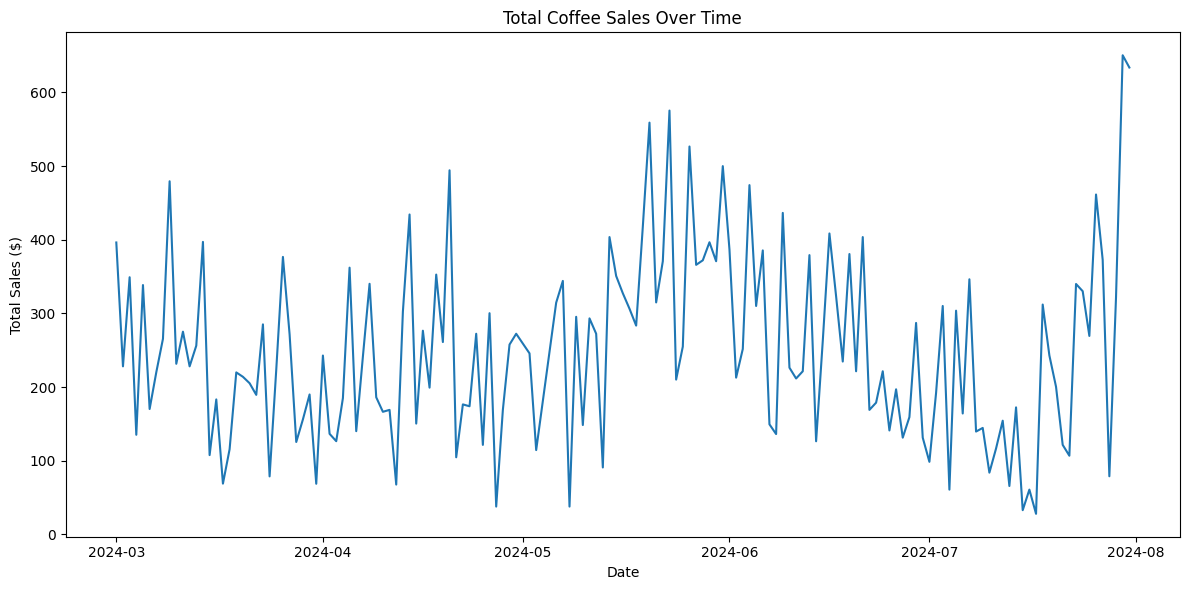

In [ ]:
# Plot total sales over time
plt.figure(figsize=(12,6))
sales_over_time = main_df.groupby(main_df['date'].dt.date)['money'].sum()
sales_over_time.plot()
plt.title('Total Coffee Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

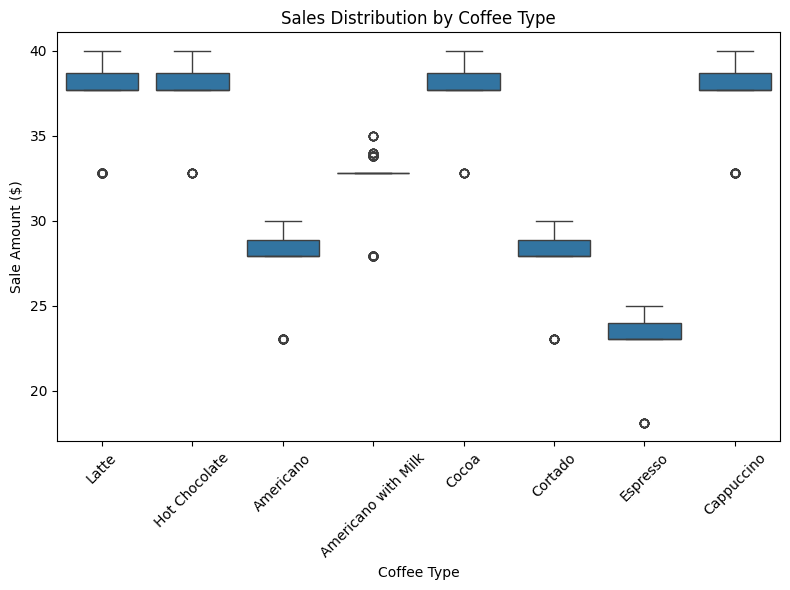

In [ ]:
# Plot sales distribution by coffee type
plt.figure(figsize=(8,6))
sns.boxplot(x='coffee_name', y='money', data=main_df)
plt.title('Sales Distribution by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Sale Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


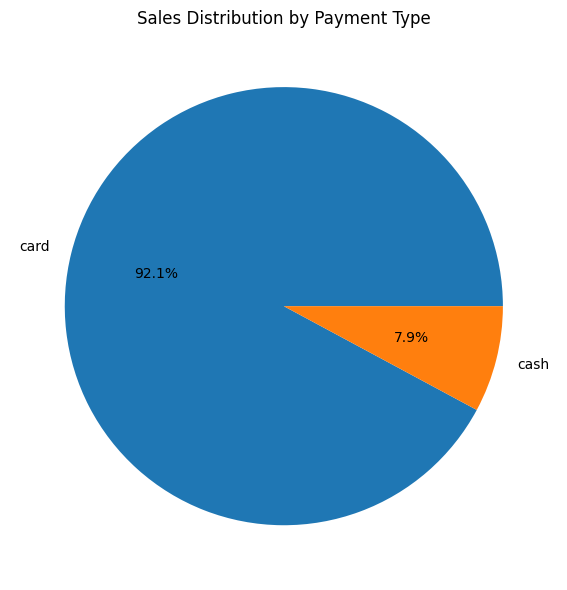

In [ ]:
# Plot sales by payment type
plt.figure(figsize=(6,6))
sales_by_cash_type = main_df['cash_type'].value_counts()
sales_by_cash_type.plot.pie(autopct='%1.1f%%')
plt.title('Sales Distribution by Payment Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

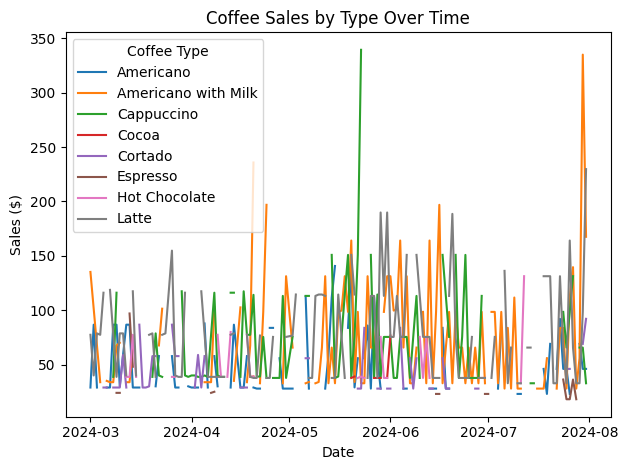

In [ ]:
# Additional analysis: sales by coffee name over time
plt.figure(figsize=(12,6))
sales_by_coffee_time = main_df.groupby([main_df['date'].dt.date,'coffee_name'])['money'].sum().unstack()
sales_by_coffee_time.plot()
plt.title('Coffee Sales by Type Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend(title='Coffee Type')
plt.tight_layout()
plt.show()

In [ ]:
# Top 5 most sold coffee types
top_coffees = main_df['coffee_name'].value_counts().head(5)
print('Top 5 Coffee Types by Quantity Sold:')
print(top_coffees)


Top 5 Coffee Types by Quantity Sold:
coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Name: count, dtype: int64


In [ ]:
# Top 5 most profitable coffee types
top_profit_coffees = main_df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).head(5)
print('\ Top 5 Coffee Types by Revenue:')
print(top_profit_coffees)

\ Top 5 Coffee Types by Revenue:
coffee_name
Latte                  9009.14
Americano with Milk    8601.94
Cappuccino             7333.14
Americano              4644.54
Hot Chocolate          2778.48
Name: money, dtype: float64


<Figure size 1200x600 with 0 Axes>

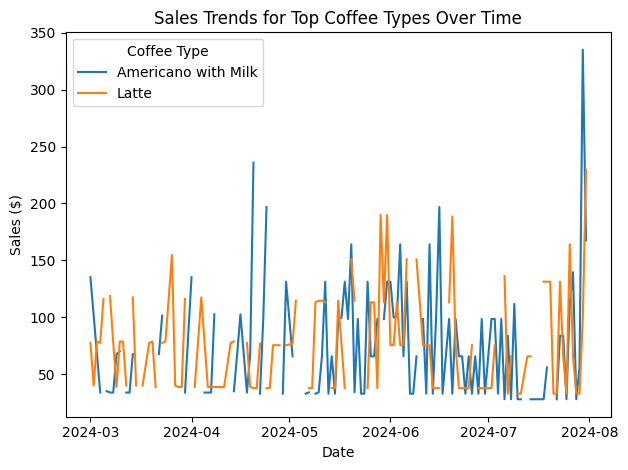

In [ ]:
# Plot sales over time for top coffee types
plt.figure(figsize=(12,6))
sales_top_coffees = main_df[main_df['coffee_name'].isin(['Latte', 'Americano with Milk'])]
sales_by_type_time = sales_top_coffees.groupby([sales_top_coffees['date'].dt.date,'coffee_name'])['money'].sum().unstack()
sales_by_type_time.plot()
plt.title('Sales Trends for Top Coffee Types Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend(title='Coffee Type')
plt.tight_layout()
plt.show()

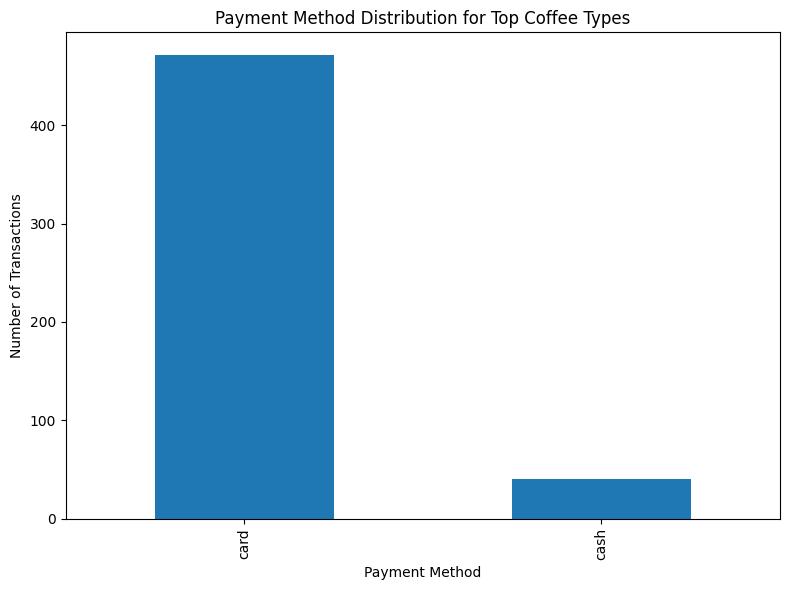

In [ ]:
# Analyze payment methods for top coffee types
plt.figure(figsize=(8,6))
sales_payment_method = main_df[main_df['coffee_name'].isin(['Latte', 'Americano with Milk'])]
payment_counts = sales_payment_method['cash_type'].value_counts()
payment_counts.plot.bar()
plt.title('Payment Method Distribution for Top Coffee Types')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()